In [8]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
with open('tmp.pickle', 'rb') as f:
    data = pickle.load(f)

with open('HW2_Data.pickle', 'rb') as f:
    Data = pickle.load(f)
To = Data['To'][:6*24*2] # outdoor air temperature in degC
q_solar = Data['q_solar'][:6*24*2] # absorbed solar radiation in W

def func_price(i):
    # $/kWh
    hour = (i//6)%24
    if hour<7:
        return 0.082
    elif (hour>=7)&(hour<11):
        return 0.113
    elif (hour>=11)&(hour<17):
        return 0.17
    elif (hour>=17)&(hour<19):
        return 0.113
    else:
        return 0.082

# HVAC COP
def func_COP(To):
    return -2/25 * To + 6


Price = np.array([func_price(i) for i in range(q_solar.shape[0])])
COP = np.array([func_COP(i) for i in To])

In [9]:
temperature = []
for i in range(len(data['obs_history'])):
    temperature.append(data['obs_history'][i]['Tin'])
temperature = np.array(temperature).flatten()

action = np.array(data['act_history']).flatten()

penalty=[]
for temp in temperature:
    if temp > 24.:
        penalty.append(temp - 24.)
    else:
        penalty.append(-0.05)
penalty = np.array(penalty)

cost = (action/COP/6 * Price + 0.000798)*1000
reward = cost - 10*penalty[1:]

In [10]:
print(penalty.mean())
print(cost.mean())
print(reward.mean())
print(reward.sum())

1.0976995776986658
0.798
-10.21884645676786
-2943.027779549144


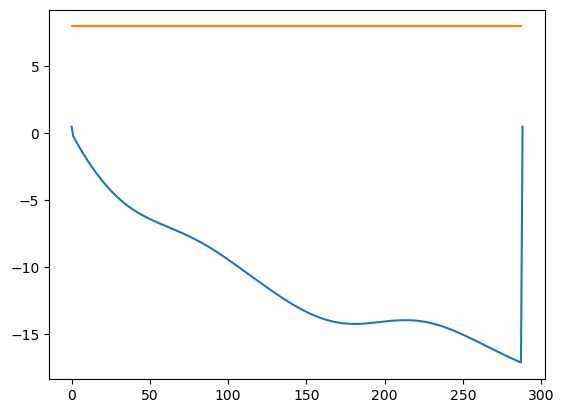

In [11]:
plt.plot(-penalty*10)
plt.plot(cost*10)

(-1250.0, 1000.0)

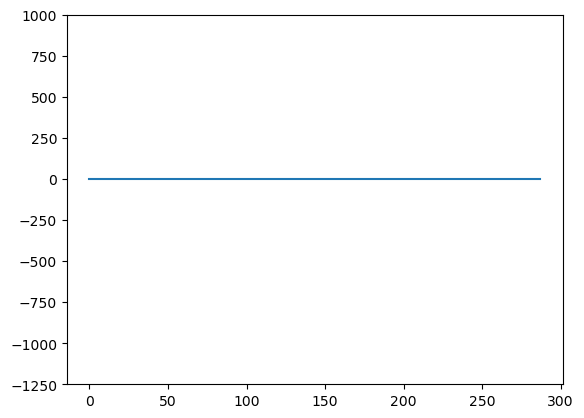

In [12]:
plt.plot(action*1000)
plt.ylim(-1250,1000)

(19.0, 31.0)

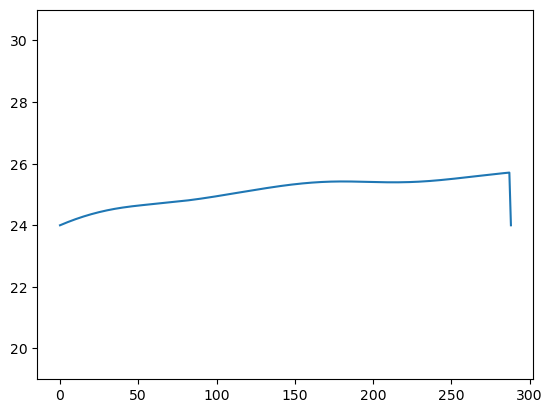

In [13]:
plt.plot(temperature)
plt.ylim(19,31)